# Data Analysis of Homicide Data in US 

 ##### By Zhuangdie Alan Zhou

### 1 Data Description

This is data on more than 52,000 criminal homicides from 2007 to 2017 in 50 of the largest American cities collected by The Washington Post. The data included the location of the killing, whether an arrest was made and, in most cases, basic demographic information about each victim.

There are 12 variables in the data set. They are uid, reported_date, victim_last, victim_first, victim_race, victim_age, victim_sex, city, state, lat, lon and disposition.

The data is used in https://www.washingtonpost.com/graphics/2018/investigations/unsolved-homicide-database/?utm_term=.ccba6d1224ab and downloaded from https://github.com/washingtonpost/data-homicides.

I am interested in this data because I am very concerned about crimes distribution among states, races and ages in US as well as the percentage that severe crimes like homicide are solved.

An overview of the first few lines of the data is shown as below.

In [174]:
import pandas as pd
homicide = pd.read_csv('homicide-data.csv',encoding='latin1') 
homicide.head()

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
0,Alb-000001,20100504,GARCIA,JUAN,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest
1,Alb-000002,20100216,MONTOYA,CAMERON,Hispanic,17,Male,Albuquerque,NM,35.056810,-106.715321,Closed by arrest
2,Alb-000003,20100601,SATTERFIELD,VIVIANA,White,15,Female,Albuquerque,NM,35.086092,-106.695568,Closed without arrest
3,Alb-000004,20100101,MENDIOLA,CARLOS,Hispanic,32,Male,Albuquerque,NM,35.078493,-106.556094,Closed by arrest
4,Alb-000005,20100102,MULA,VIVIAN,White,72,Female,Albuquerque,NM,35.130357,-106.580986,Closed without arrest


### 2 Questions of Interest

1 Are there any geographic patterns of homicide happening?

2 Are there any demographic patterns of victims? 

3 What is the trend of homicide happening in these 10 years?

4 Are dispositions different between states or cities?

### 3 Data Cleaning

There are several rows containing missing values but no obvious erroneous data and no tables need merging. So here we just drop the rows containing at least one missing value and convert victim_age to numeric type.

In [190]:
homicide = homicide.dropna()
homicide['victim_age']= pd.to_numeric(homicide['victim_age'][homicide['victim_age']!='Unknown'])
#homicide.to_csv('homicide-cleaned.csv')

### 4 Data Visualization

In [176]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

Text(0.5, 1.0, 'Number of victims among different states')

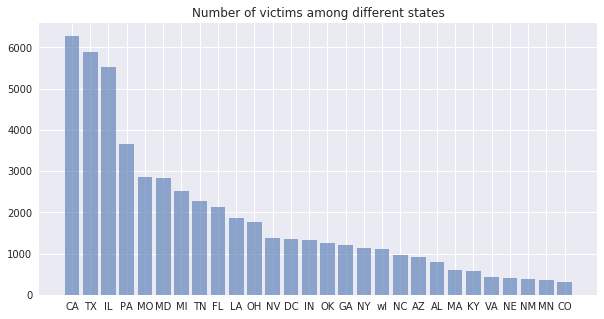

In [180]:
nstates = homicide.groupby('state',as_index = False)[['uid']].count()
nstates = nstates.sort_values('uid',ascending = False)
plt.figure(figsize=(10,5))
plt.bar(nstates['state'],nstates['uid'],align='center',alpha=0.6)
plt.title('Number of victims among different states')

Text(0.5, 1.0, 'Number of victims among different cities')

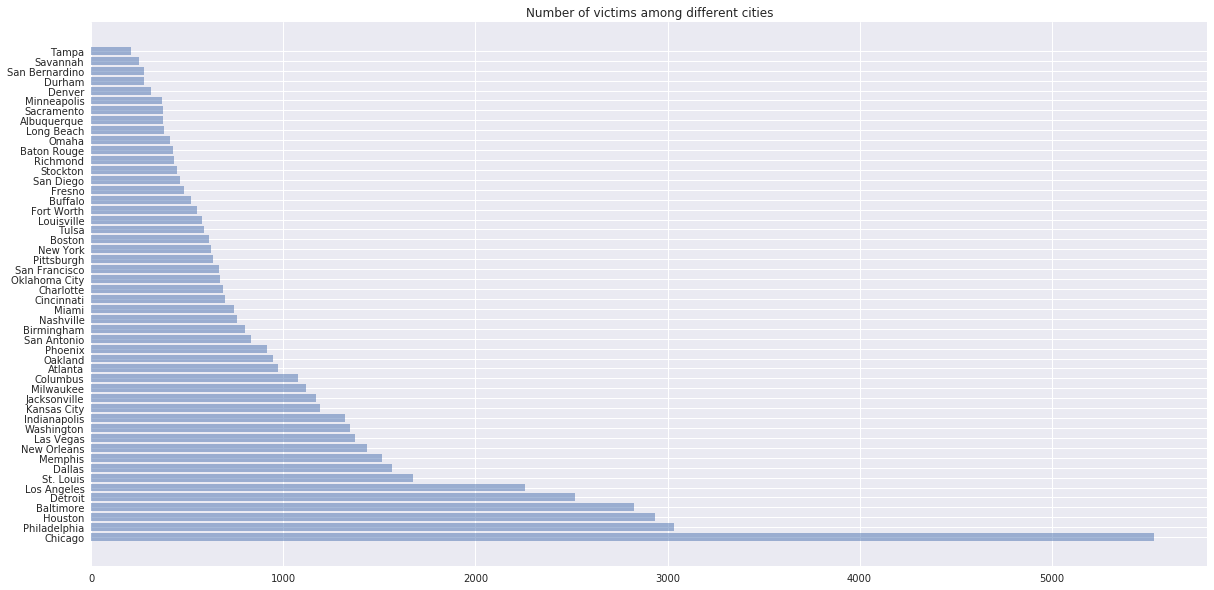

In [182]:
ncities = homicide.groupby('city',as_index = False)[['uid']].count()
ncities = ncities.sort_values('uid',ascending = False)
plt.figure(figsize=(20,10))
plt.barh(ncities['city'],ncities['uid'],align='center',alpha=0.5)
plt.title('Number of victims among different cities')

Text(0.5, 1.0, 'Age distribution of victims among different states')

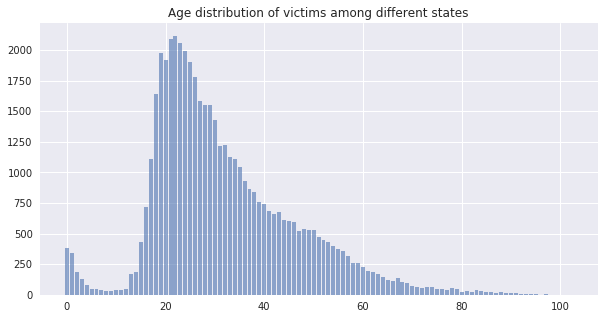

In [183]:
nages1 = homicide.groupby('victim_age',as_index = False)[['uid']].count()
plt.figure(figsize=(10,5))
#nages1.plot.bar()
plt.bar(nages1['victim_age'],nages1['uid'],align='center',alpha=0.6)
plt.title('Age distribution of victims among different states')

Text(0.5, 1.0, 'Top ages of victims among different states')

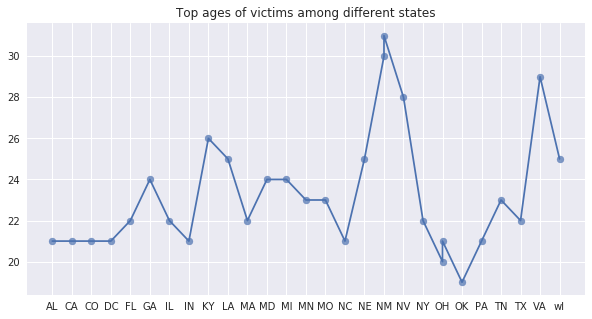

In [184]:
h = homicide.groupby(['state','victim_age'],as_index = False)[['uid']].count()
h = h[h.groupby(['state'])['uid'].transform(max)== h['uid']]
plt.figure(figsize=(10,5))
plt.scatter(h['state'],h['victim_age'],alpha=0.7)
plt.plot(h['state'],h['victim_age'])
plt.title('Top ages of victims among different states')

Text(0.5, 1.0, 'Race distribution of victims among different states')

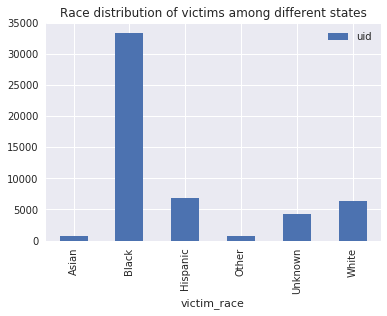

In [185]:
nraces = homicide.groupby('victim_race')[['uid']].count()
nraces.plot.bar()
plt.title('Race distribution of victims among different states')

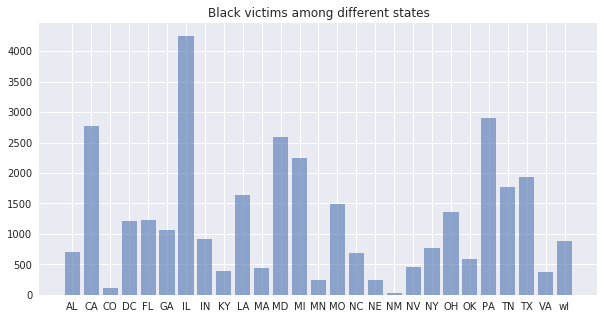

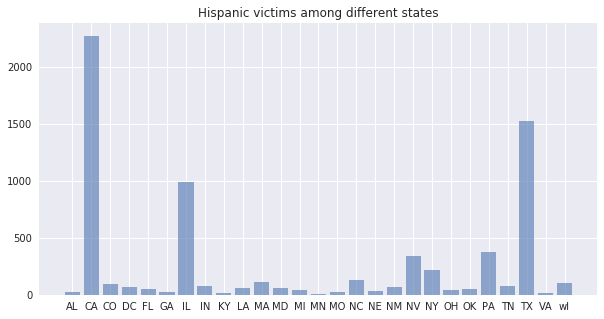

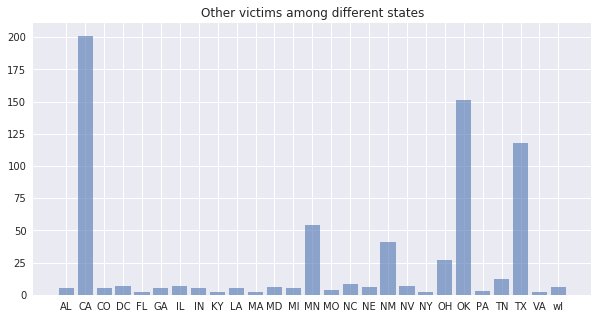

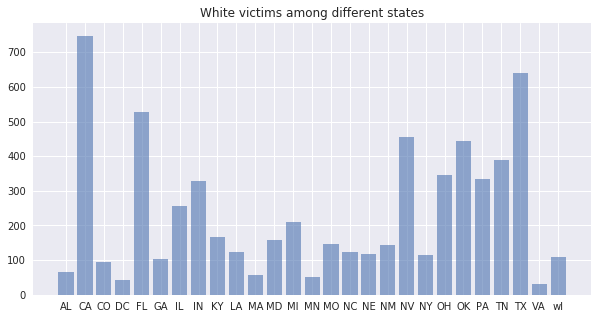

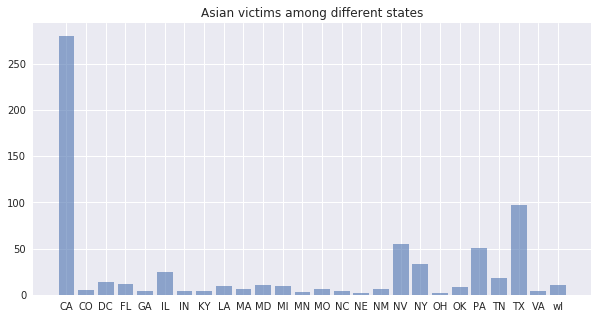

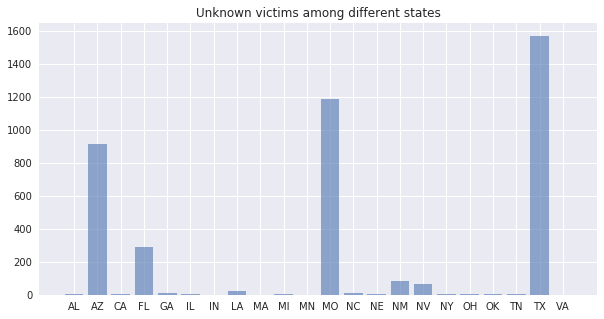

In [186]:
import seaborn
racerank = homicide.groupby(['state','victim_race'],as_index = False)[['uid']].count()

#fg = seaborn.factorplot(x='state', y='uid', col='victim_race', data=racerank, kind='bar',size =6,aspect=4,orient = "v")

#fg.set_xlabels('')
d1 = racerank[racerank['victim_race']=='Black']
d2 = racerank[racerank['victim_race']=='Hispanic']
d3 = racerank[racerank['victim_race']=='Other']
d4 = racerank[racerank['victim_race']=='White']
d5 = racerank[racerank['victim_race']=='Asian']
d6 = racerank[racerank['victim_race']=='Unknown']
plt.figure(figsize=(10,5))
plt.bar(d1['state'],d1['uid'],align='center',alpha=0.6)
plt.title('Black victims among different states')
plt.show()
plt.figure(figsize=(10,5))
plt.bar(d2['state'],d2['uid'],align='center',alpha=0.6)
plt.title('Hispanic victims among different states')
plt.show()
plt.figure(figsize=(10,5))
plt.bar(d3['state'],d3['uid'],align='center',alpha=0.6)
plt.title('Other victims among different states')
plt.show()
plt.figure(figsize=(10,5))
plt.bar(d4['state'],d4['uid'],align='center',alpha=0.6)
plt.title('White victims among different states')
plt.show()
plt.figure(figsize=(10,5))
plt.bar(d5['state'],d5['uid'],align='center',alpha=0.6)
plt.title('Asian victims among different states')
plt.show()
plt.figure(figsize=(10,5))
plt.bar(d6['state'],d6['uid'],align='center',alpha=0.6)
plt.title('Unknown victims among different states')
plt.show()

Text(0.5, 1.0, 'Homicide trend between 2007-2017')

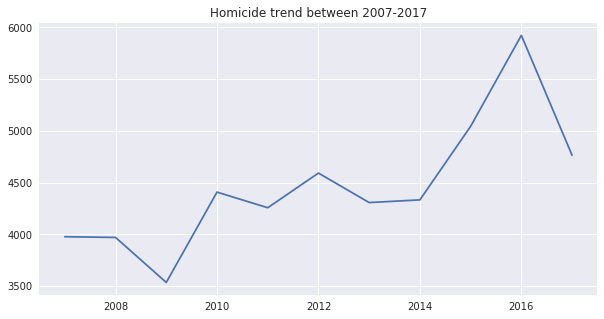

In [191]:
h1 = homicide.groupby(['reported_date'],as_index = False)[['uid']].count()
h1['reported_date'] = h1['reported_date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
h1['reported_date'] = h1['reported_date'].dt.year
h2 = h1.groupby(['reported_date'],as_index = False)[['uid']].sum()
plt.figure(figsize=(10,5))
plt.plot(h2['reported_date'],h2['uid'])
plt.title('Homicide trend between 2007-2017')

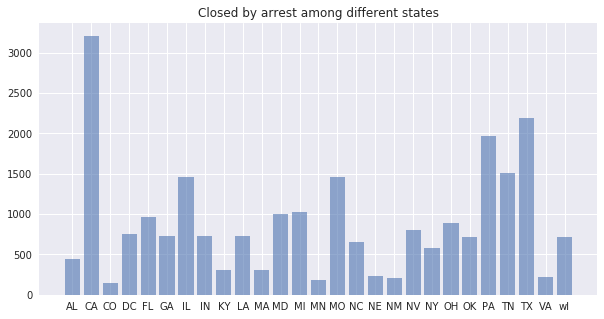

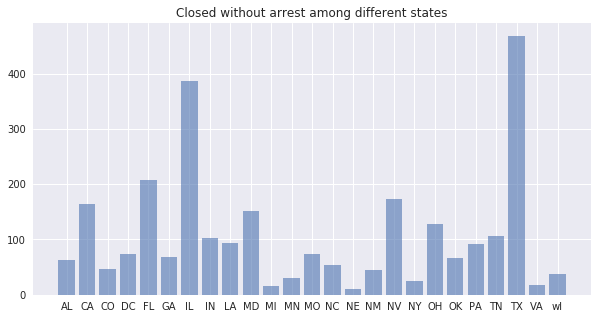

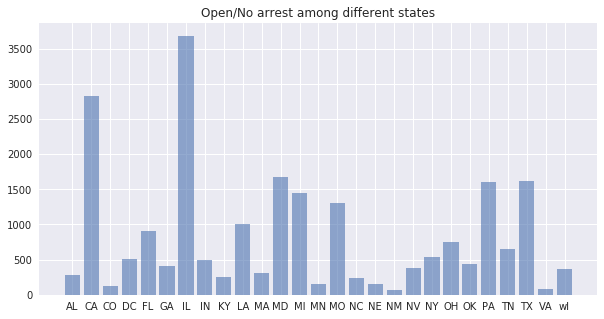

In [192]:
disprank = homicide.groupby(['state','disposition'],as_index = False)[['uid']].count()
f1 = disprank[disprank['disposition']=='Closed by arrest']
f2 = disprank[disprank['disposition']=='Closed without arrest']
f3 = disprank[disprank['disposition']=='Open/No arrest']
plt.figure(figsize=(10,5))
plt.bar(f1['state'],f1['uid'],align='center',alpha=0.6)
plt.title('Closed by arrest among different states')
plt.show()
plt.figure(figsize=(10,5))
plt.bar(f2['state'],f2['uid'],align='center',alpha=0.6)
plt.title('Closed without arrest among different states')
plt.show()
plt.figure(figsize=(10,5))
plt.bar(f3['state'],f3['uid'],align='center',alpha=0.6)
plt.title('Open/No arrest among different states')
plt.show()

### 5 Insights from the Data

##### Figure 1: Number of victims among different states

CA, TX and IL are the top three states with the most number of victims while CO has the lowest number of victims. As CA and TX have the most popularity in 2017 it is reasonable for them to have more records. While it should be pointed out that I, which ranked 6 in popularity in 2017, has almost twice the number of victims of FL, which ranked 3 in popularity in 2017.

##### Figure 2: Number of victims among different cities

Chicago, Philadelphia and Houston are the top three cities that have the most number of victims. Associating this with the plot of victims across states in Sheet 1, we can have a guess that Chicago might is to blame for IL's ranking at 3 in number of victims.

##### Figure 3: Age distribution of victims among all states

From 0 to 90 years old, we can see a bell-shaped curve when it comes to the number of victims. Children under the age of 9 has an increasing chance of being a victim as their age descends to 0, while children over the age of 9 also has an increasing chance of being a victim as their ages ascend. And the most victims appeared in 22-year-olds with 2115 records while chances of being victims keeps dropping as age grows for people over 22 years old.

These can be easily interpreted because infants have no power to defense and are most fragile. Children tends to have more consciousness of self protecting as they grow up so their chance of being a victim dropped as they age before 9. People aged between 20-40 have the largest social networks and have more chance of exposed to conflicts between relationships so they are most likely to be victims of homicide.

##### Figure 4: Top ages of victims among different states

When only looking at the top ages appeared in victims across states, conclusion turns to be very similar with the last plot. Almost among all the states, top ages of victims are between 18-28. So the conclusion drawn about ages of victims across the whole country can also be applied to every state.

##### Figure 5: Race distribution of victims among all states

Number of black victims is overwhelming compared to all the other races. Hispanics and Whites appeared about the same in victims while Asians victims has the smallest number.

##### Figure 6: Rank  of races of victims among different states

The distribution of races of victims by states shares a similar pattern with that of the whole country. Number of Black victims is dominating in all states with IL with the most Black victims. CA has the most Hispanic victims, Asian victims, White victims and other victims.

##### Figure 7: Homicide trend between 2007-2017

Looking at number of homicides within these ten years, there is an obvious increasing trend from 2007 to 2016 with 2016 peaked at 6285 records of homicide. And then a sharp decrease of homicide can be observed in 2017.

##### Figure 8: Number of dispositions among different states

All states have relatively low number of Closed without arrest compared to Closed by arrest and Open/No arrest. CA and TX have the most number of Closed without arrest while IL has the most number of Open/No arrest. This is an interesting phenomenon as within the top 3 states of most number of homicide, dispositions are quite different.